In [118]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests

In [119]:
fulldf = pd.DataFrame.from_csv("/Users/walkerevans/Documents/Senior/Stat121/ActiveFPData/cleanedFulldf.csv")

In [120]:
fulldf.head()

,avg_price,lowest_price_good,lowest_price,highest_price,city,venuescore,ticket_score,home_team,away_team,hometeamscore,awayteamscore,dateutc,daysaway,dateloaded_ticket,City,cntStars_home,WPCT_home,STRK_home,dateloaded_rank_home,cntStars_away,WPCT_away,STRK_away,dateloaded_rank_away,nbaRanK,ttlAudi,avgAudi,Population,numTeams
0,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.000,17,2015-11-29,14,178459,17845,4478000,4
1,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.000,18,2015-11-30,14,178459,17845,4478000,4
2,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.053,1,2015-12-02,14,178459,17845,4478000,4
3,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.050,1,2015-12-03,14,178459,17845,4478000,4
4,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.050,1,2015-12-04,14,178459,17845,4478000,4


In [121]:
dates = fulldf["dateutc"]

import holidays as hd
import datetime

In [122]:
hols = hd.US()
holidays = []
dateslist = []
for date in dates:
    datetypedate = datetime.datetime.strptime(date, "%Y-%m-%d").date()
    dateslist.append(datetypedate)
    holidays.append(int(datetypedate in hols))

In [123]:
fulldf["holiday"] = holidays

In [124]:
weekday = []
for date in dates:
    weekday.append(datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A'))

# sources: http://stackoverflow.com/questions/16766643/convert-date-string-to-day-of-week

In [125]:
fulldf["weekday"] = weekday

In [126]:
forindexdateutc = np.unique(dateslist)
indexdateutc = range(1,len(forindexdateutc))

fulldf["dateutcindateform"] = dateslist

In [127]:
teams = np.unique(fulldf["home_team"])

In [128]:
teamdaysinfo= {}
for team in teams:
    cutdf = fulldf[fulldf["home_team"] == team]
    grouped = cutdf.groupby("dateutcindateform")
    teamdaysinfo[team] = {"mean": grouped["lowest_price"].mean(), "std": grouped["lowest_price"].std(), "price": grouped["lowest_price"], "holiday": grouped["holiday"].mean()}
    
    
#     means = grouped["lowest_price"].mean()
#     plt.figure(figsize=(24,10))
#     plt.scatter(fulldf["daysaway"], fulldf["lowest_price"], alpha = .01)
#     plt.plot(means.keys().values, means.values, color = "red")
#     plt.scatter(fulldf["daysaway"], fulldf["holiday"]*300)

In [129]:
import urllib

fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(80, 150), tight_layout=True)
for ax, team in zip(axes.ravel(), teams):
    dat = teamdaysinfo[team]
    ax.scatter(dat['mean'].index, dat['mean'], alpha=0.5, c = dat["holiday"].values, s=800, cmap='rainbow')
    stddev = np.where(np.isnan(dat['std']),50*dat['std'].shape[0], dat['std'])
    ax.fill_between(dat['mean'].index, dat['mean']+stddev, dat['mean']-stddev, alpha=0.1, color="red")
    
    ax.set_title(team)
    ax.set_xlabel('Date')
    ax.set_ylabel('Ticket Price')
    
# sources: http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

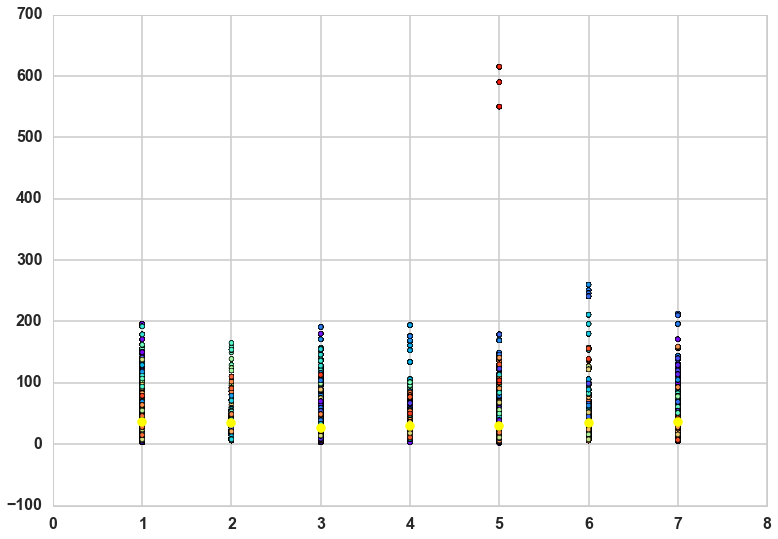

In [130]:
weekdayindex = np.array([1,2,3,4,5,6,7])
weekdayindexmatch = np.array(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

weekdays = fulldf["weekday"]
weekdaysbyindex = []
for day in weekdays:
    weekdaysbyindex.append(int(weekdayindex[weekdayindexmatch == day]))

fulldf["weekdaysbyindex"] = weekdaysbyindex
    
plt.scatter(weekdaysbyindex, fulldf["lowest_price"], c = fulldf["daysaway"], cmap = "rainbow")

grouped = fulldf.groupby("weekdaysbyindex")
means = grouped["lowest_price"].mean()
plt.scatter(grouped.groups.keys(), means, s = 80, color = "yellow")

In [131]:
fulldf.to_csv("/Users/walkerevans/Documents/Senior/Stat121/ActiveFPData/cleanedfulldatawithholidays.csv")

In [132]:
fulldf.head()

,avg_price,lowest_price_good,lowest_price,highest_price,city,venuescore,ticket_score,home_team,away_team,hometeamscore,awayteamscore,dateutc,daysaway,dateloaded_ticket,City,cntStars_home,WPCT_home,STRK_home,dateloaded_rank_home,cntStars_away,WPCT_away,STRK_away,dateloaded_rank_away,nbaRanK,ttlAudi,avgAudi,Population,numTeams,holiday,weekday,dateutcindateform,weekdaysbyindex
0,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.000,17,2015-11-29,14,178459,17845,4478000,4,1,Thursday,2015-11-26,5
1,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.000,18,2015-11-30,14,178459,17845,4478000,4,1,Thursday,2015-11-26,5
2,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.053,1,2015-12-02,14,178459,17845,4478000,4,1,Thursday,2015-11-26,5
3,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.050,1,2015-12-03,14,178459,17845,4478000,4,1,Thursday,2015-11-26,5
4,56,27,27,257,Boston,0.85468,0.76464,Boston Celtics,Philadelphia 76ers,0.74926,0.70023,2015-11-26,1,2015-11-25,Boston,0,0.563,2,2015-11-29,0,0.050,1,2015-12-04,14,178459,17845,4478000,4,1,Thursday,2015-11-26,5
